In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_blue_waters_posix_combined = pd.read_csv(r"../data/blue_waters_posix_with_paths_no_negative_outliers.csv")

### Drop time columns and bandwidth except for POSIX_TOTAL_TIME

In [3]:
df_blue_waters_posix_no_time = df_blue_waters_posix_combined.drop(['POSIX_F_READ_TIME','POSIX_F_WRITE_TIME','POSIX_F_META_TIME',
                                                                    'POSIX_F_MAX_READ_TIME','POSIX_F_MAX_WRITE_TIME',
                                                                    'POSIX_F_FASTEST_RANK_TIME','POSIX_F_SLOWEST_RANK_TIME',
                                                                    'bandwidth','start_time_sec','end_time_sec'],axis=1)

In [4]:
df_blue_waters_posix_no_time.head()

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,...,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,exe,lustre,path
0,1280,-1281,-1281,1807,0,0,2561,0,0,-1281,...,0,0,0,0,184,0.970498,213,Hsigma,1,/hpcwork/noco0056/io_transfer_learning/data/bl...
1,168420,-5232,-5232,7505724,5401751,11345341,394840,0,1,-5232,...,0,0,0,0,0,147.540409,80,SpEC,1,/hpcwork/noco0056/io_transfer_learning/data/bl...
2,62567,-1477,-1477,2300215,441912,1214829,280660,0,1,-1477,...,0,0,0,0,-1,24.994056,48,SpEC,1,/hpcwork/noco0056/io_transfer_learning/data/bl...
3,2366,-2367,-2367,3342,0,0,4733,0,0,-2367,...,0,0,0,0,127,0.487127,394,Hsigma,1,/hpcwork/noco0056/io_transfer_learning/data/bl...
4,8709,-288,-288,1521073,6331589,2013343,28430,0,0,-288,...,0,0,0,0,-1,14389.735087,256,CCTM_v52_Linux2_x86_64intel,1,/hpcwork/noco0056/io_transfer_learning/data/bl...


In [5]:
df_blue_waters_posix_no_time.to_csv(r"../data/blue_waters_posix_with_paths_no_negative_outliers_no_time.csv", index=False)

In [6]:
df_blue_waters_posix_no_time.shape

(820701, 93)

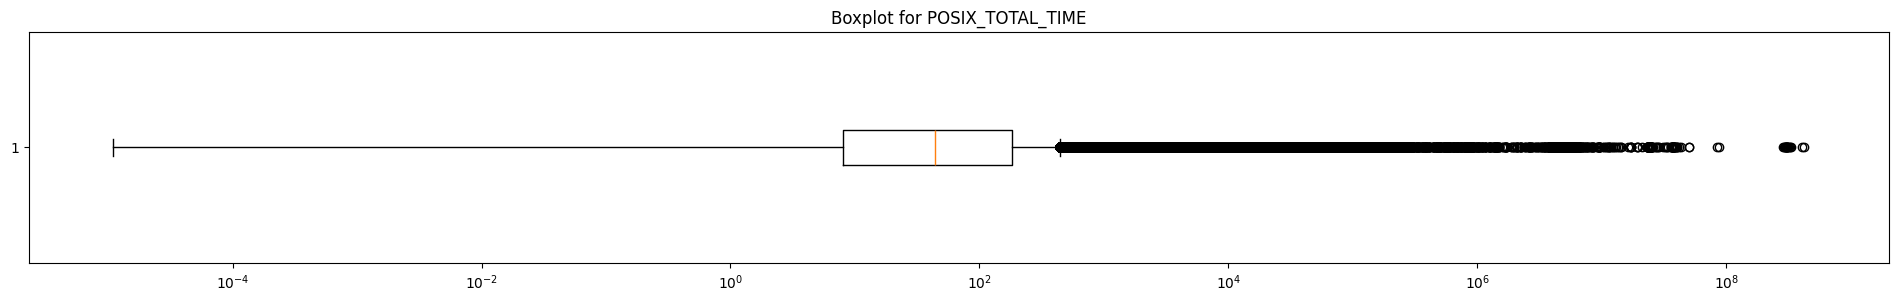

In [7]:
fig, ax = plt.subplots(figsize=(24, 3))
plt.title("Boxplot for POSIX_TOTAL_TIME")
ax.boxplot(df_blue_waters_posix_no_time.POSIX_TOTAL_TIME, vert=False)
ax.set_xscale("log")

In [8]:
POSIX_TOTAL_TIME_q1 = df_blue_waters_posix_no_time.POSIX_TOTAL_TIME.quantile(0.25)
POSIX_TOTAL_TIME_q3 = df_blue_waters_posix_no_time.POSIX_TOTAL_TIME.quantile(0.75)
POSIX_TOTAL_TIME_iqr = POSIX_TOTAL_TIME_q3 - POSIX_TOTAL_TIME_q1
POSIX_TOTAL_TIME_iqr

174.18061327934265

In [9]:
POSIX_TOTAL_TIME_q1 - 1.5 * POSIX_TOTAL_TIME_iqr

-253.31888258457184

In [10]:
POSIX_TOTAL_TIME_q3 + 1.5 * POSIX_TOTAL_TIME_iqr

443.40357053279877

In [11]:
filter = (df_blue_waters_posix_no_time.POSIX_TOTAL_TIME >= POSIX_TOTAL_TIME_q1 - 1.5 * POSIX_TOTAL_TIME_iqr) & (df_blue_waters_posix_no_time.POSIX_TOTAL_TIME <= POSIX_TOTAL_TIME_q3 + 1.5 * POSIX_TOTAL_TIME_iqr)

POSIX_TOTAL_TIME_outliers = df_blue_waters_posix_no_time.loc[(filter)==False]
POSIX_TOTAL_TIME_outliers.head()

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,...,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,exe,lustre,path
4,8709,-288,-288,1521073,6331589,2013343,28430,0,0,-288,...,0,0,0,0,-1,14389.735087,256,CCTM_v52_Linux2_x86_64intel,1,/hpcwork/noco0056/io_transfer_learning/data/bl...
5,8709,-288,-288,1516465,8334307,2006943,28430,0,0,-288,...,0,0,0,0,-1,14340.456718,256,CCTM_v52_Linux2_x86_64intel,1,/hpcwork/noco0056/io_transfer_learning/data/bl...
6,8709,-288,-288,1511857,13971437,2006175,28430,0,0,-288,...,0,0,0,0,-1,15207.986212,256,CCTM_v52_Linux2_x86_64intel,1,/hpcwork/noco0056/io_transfer_learning/data/bl...
10,8709,-288,-288,1521329,6333992,2008991,28430,0,0,-288,...,0,0,0,0,-1,14634.802894,256,CCTM_v52_Linux2_x86_64intel,1,/hpcwork/noco0056/io_transfer_learning/data/bl...
15,8709,-288,-288,1517489,6333328,2007199,28430,0,0,-288,...,0,0,0,0,-1,15488.418552,256,CCTM_v52_Linux2_x86_64intel,1,/hpcwork/noco0056/io_transfer_learning/data/bl...


In [12]:
df_blue_waters_posix_no_time_no_outliers = df_blue_waters_posix_no_time.loc[(filter)==True]
df_blue_waters_posix_no_time_no_outliers.head()

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,...,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,exe,lustre,path
0,1280,-1281,-1281,1807,0,0,2561,0,0,-1281,...,0,0,0,0,184,0.970498,213,Hsigma,1,/hpcwork/noco0056/io_transfer_learning/data/bl...
1,168420,-5232,-5232,7505724,5401751,11345341,394840,0,1,-5232,...,0,0,0,0,0,147.540409,80,SpEC,1,/hpcwork/noco0056/io_transfer_learning/data/bl...
2,62567,-1477,-1477,2300215,441912,1214829,280660,0,1,-1477,...,0,0,0,0,-1,24.994056,48,SpEC,1,/hpcwork/noco0056/io_transfer_learning/data/bl...
3,2366,-2367,-2367,3342,0,0,4733,0,0,-2367,...,0,0,0,0,127,0.487127,394,Hsigma,1,/hpcwork/noco0056/io_transfer_learning/data/bl...
7,194995,-2560,-2560,10229035,2168343,4553213,888833,0,1,-2560,...,0,0,0,0,0,105.039295,32,SpEC,1,/hpcwork/noco0056/io_transfer_learning/data/bl...


<Axes: title={'center': 'IQR'}, xlabel='POSIX_TOTAL_TIME'>

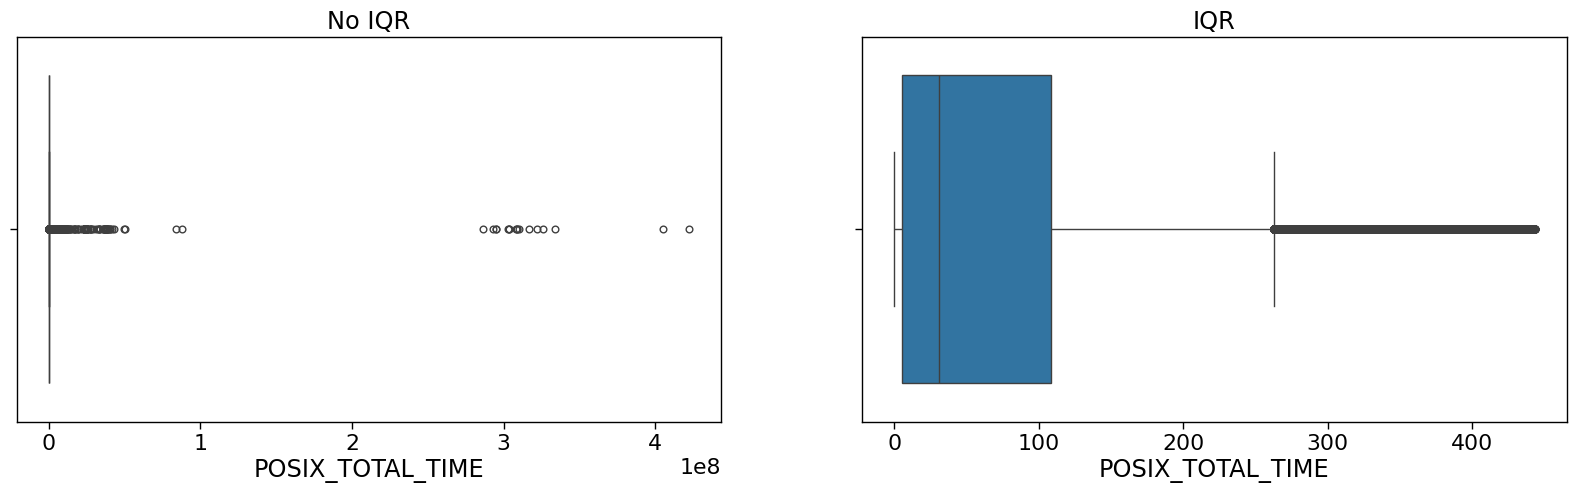

In [13]:
sns.set_context("paper", font_scale=1.8)
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
axs[0].set_title("No IQR")
sns.boxplot(x=df_blue_waters_posix_no_time.POSIX_TOTAL_TIME,ax=axs[0])
axs[1].set_title("IQR")
sns.boxplot(x=df_blue_waters_posix_no_time_no_outliers.POSIX_TOTAL_TIME,ax=axs[1])

In [14]:
df_blue_waters_posix_no_time_no_outliers.to_csv(r"../data/blue_waters_posix_with_paths_no_outliers_no_time.csv", index=False)

In [15]:
df_blue_waters_posix_no_negative_outliers_no_time = pd.read_csv(r"../data/blue_waters_posix_with_paths_no_negative_outliers_no_time.csv")

In [16]:
len(df_blue_waters_posix_no_time_no_outliers)

707276

In [17]:
len(df_blue_waters_posix_no_negative_outliers_no_time)

820701